In [26]:
from tensorflow import keras
L = keras.layers
from vaes import VAE, decaying, cos_decaying
from utils import evaluate

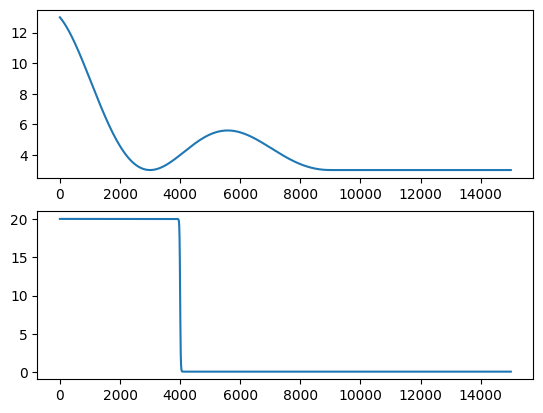

In [27]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
x = np.linspace(0, 15000, 10000)
axs[0].plot(x,cos_decaying(10, 3, 3000, 0.7, flatten_after_nth=2)(x))
axs[1].plot(x,decaying(4000, 20, .1, -0.1)(x))

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

In [29]:
def encoding_stack():
   return keras.Sequential(
        [
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.MaxPooling2D(),
            L.Conv2D(32, 5, activation='leaky_relu'),
            L.Flatten(),
        ],
        name='encoder_conv_stack'
    )
def decoding_stack():
  return keras.Sequential(
        [
            L.Dense(6*6*32, activation='leaky_relu'),
            L.Reshape((6,6,32)),
            L.Conv2DTranspose(32,5, activation='leaky_relu'),
            L.UpSampling2D(),
            L.Conv2DTranspose(16,5, activation='leaky_relu'),
            L.Conv2DTranspose(1,5, activation='leaky_relu'),
            L.Dense(1, activation='sigmoid'),
        ],
        name='decoder_conv_stack'
    )
with_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=True,
    # decay_function=cos_decaying(10., 0.1, 3000, 0.7, flatten_after_nth=2)
    decay_function=decaying(4000, 20, .01, -0.1)
)
without_classifier = VAE(
    (28,28,1),
    encoding_stack(),
    decoding_stack(),
    classify=False,
)


In [30]:
with_classifier.compile()
with_classifier.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 11s 9ms/step - loss: 77.2698 - reconstruction_loss: 52.1299 - kl_divergence_loss: 4.4943 - classification_accuracy: 0.6197 - classification_loss: 1.0323 - classification_weight: 20.0000
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 52.5071 - reconstruction_loss: 42.3068 - kl_divergence_loss: 2.8597 - classification_accuracy: 0.8878 - classification_loss: 0.3670 - classification_weight: 20.0000
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 47.5800 - reconstruction_loss: 40.2921 - kl_divergence_loss: 2.6583 - classification_accuracy: 0.9379 - classification_loss: 0.2315 - classification_weight: 20.0000
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 45.4173 - reconstruction_loss: 38.9176 - kl_divergence_loss: 2.6129 - classification_accuracy: 0.9493 - classification_loss: 0.1943 - classification_weight: 20.0000
Epoch 5/10
938/938 [=======================

In [31]:
without_classifier.compile()
without_classifier.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 9s 7ms/step - loss: 46.2956 - reconstruction_loss: 44.4131 - kl_divergence_loss: 1.8825
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 39.2449 - reconstruction_loss: 37.3662 - kl_divergence_loss: 1.8786
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 37.9342 - reconstruction_loss: 35.9215 - kl_divergence_loss: 2.0127
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 37.1102 - reconstruction_loss: 35.0210 - kl_divergence_loss: 2.0891
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 36.5912 - reconstruction_loss: 34.4458 - kl_divergence_loss: 2.1454
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 36.1883 - reconstruction_loss: 33.9945 - kl_divergence_loss: 2.1938
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 35.8300 - reconstruction_loss: 33.6085 - kl_divergence_loss: 2.2215
Epoch 

1/1 [==============================] - 0s 60ms/step
variances = array([[0.17034179, 0.38794652]], dtype=float32)
1/1 [==============================] - 0s 167ms/step


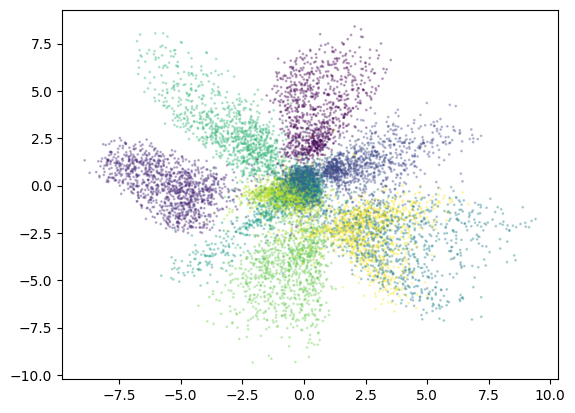

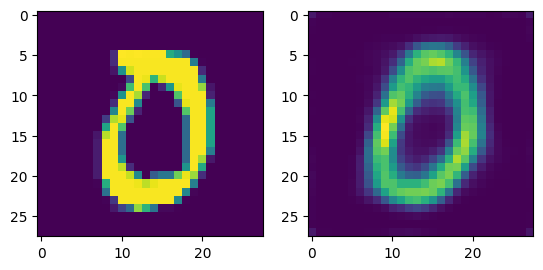

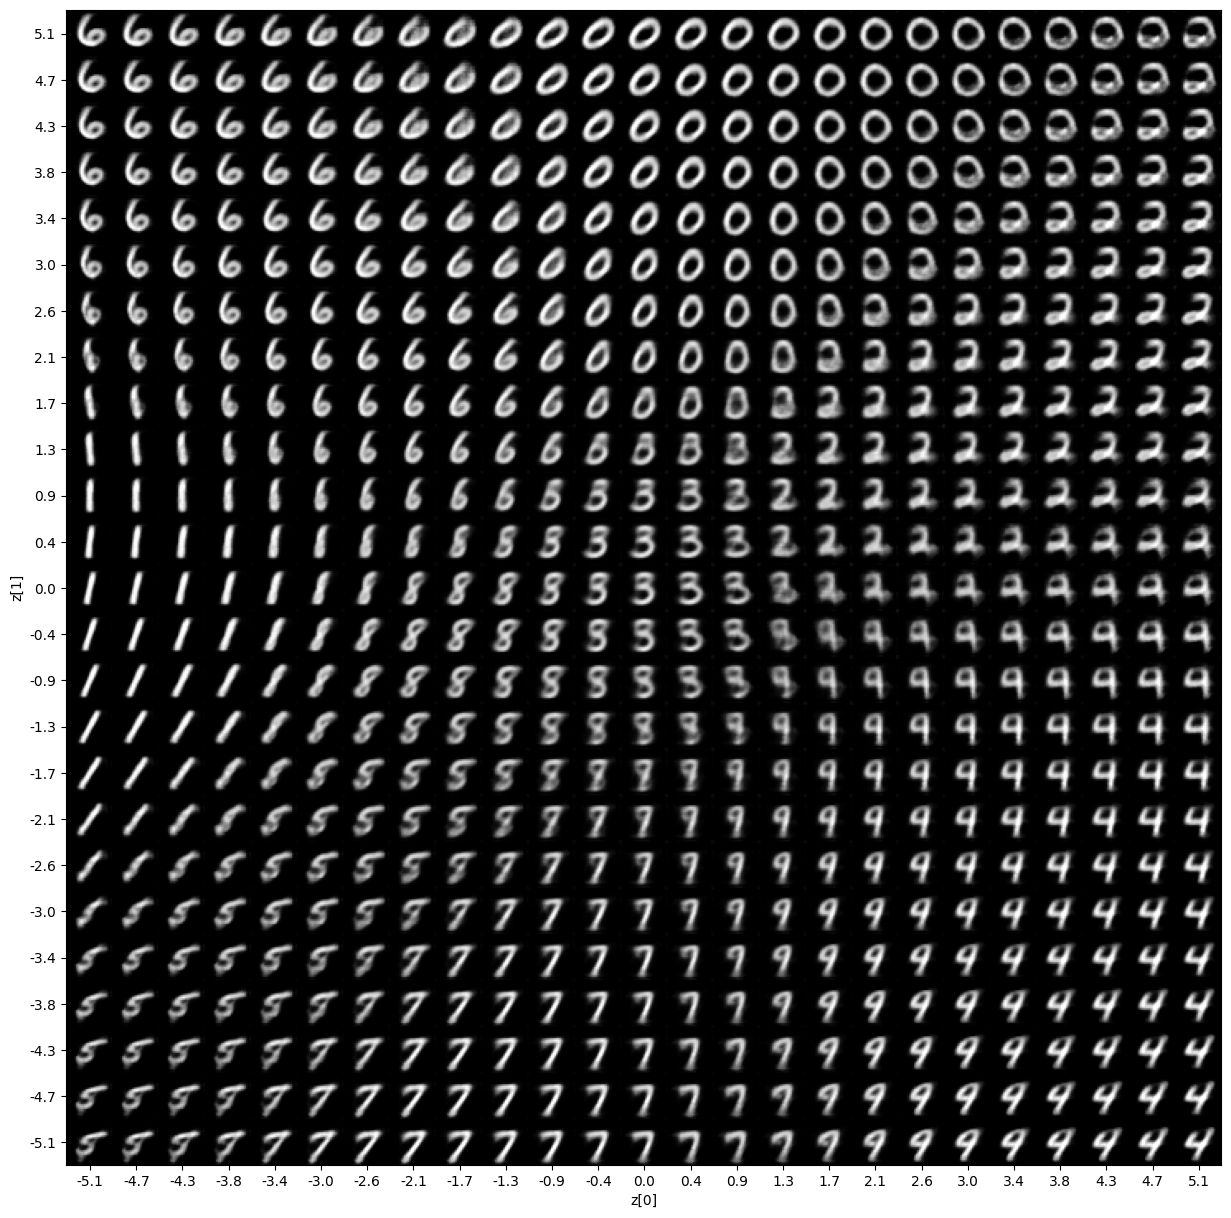

In [32]:
evaluate(with_classifier, x_test, y_test)

1/1 [==============================] - 0s 90ms/step
variances = array([[0.27774155, 0.17798966]], dtype=float32)
1/1 [==============================] - 0s 158ms/step


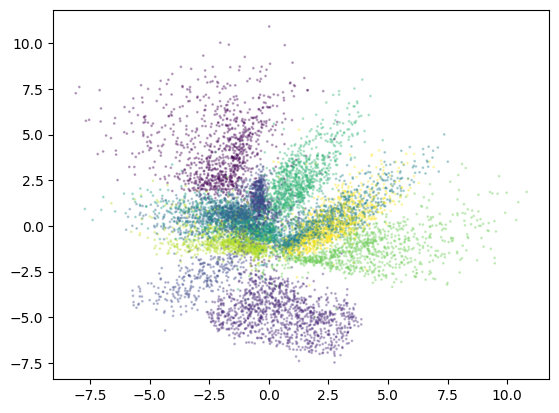

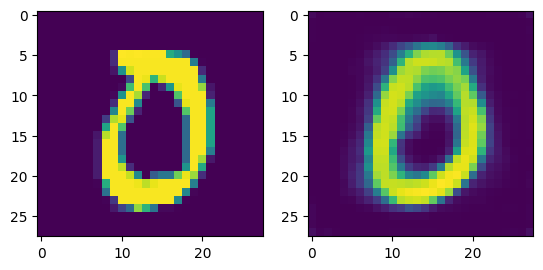

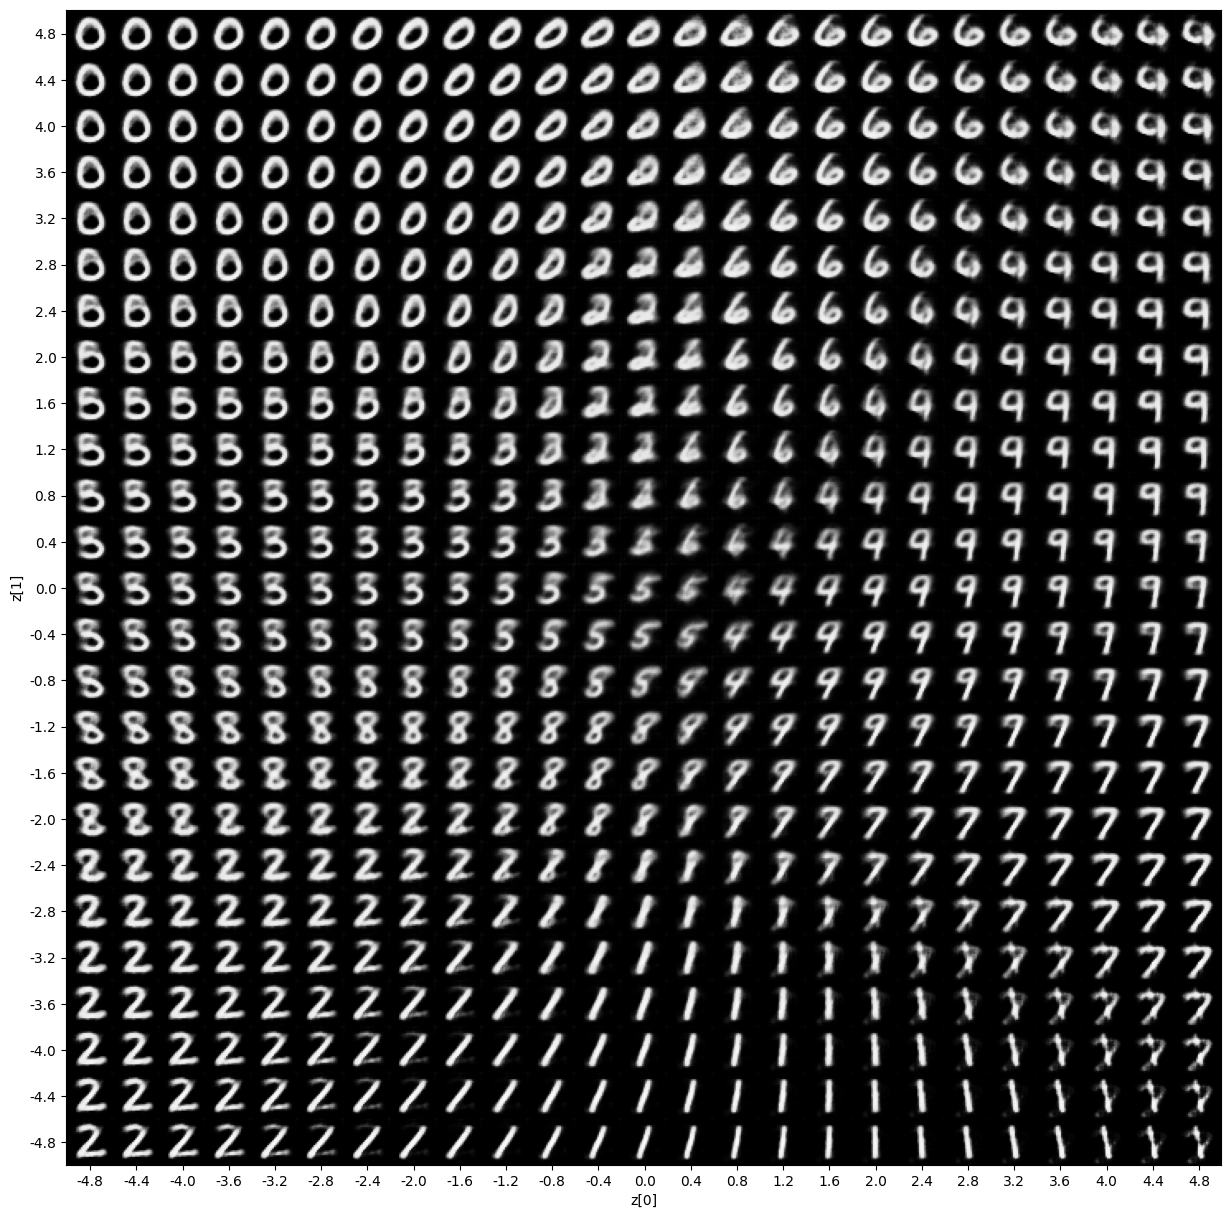

In [33]:
evaluate(without_classifier, x_test, y_test)